<a href="https://colab.research.google.com/github/efh32/TensorFlow-practice/blob/master/mlp_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mlp for regression
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as k
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)

In [ ]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
# check d-type for all values
print(type(X[0][0]))
X = X.astype('float32')
print(type(X[0][0]))

<class 'numpy.float64'>
<class 'numpy.float32'>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


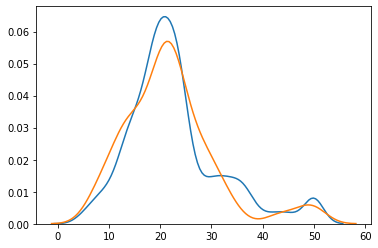

In [ ]:
#check distrubtion train and test is similar
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(y_train, hist=False)
sns.distplot(y_test, hist=False)

plt.show()

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', name='layer1', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', name='layer2'))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal', name='layer3'))
model.add(Dense(1, name='layer4'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [ ]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 53.642, RMSE: 7.324


In [ ]:
# make a prediction
test1 = np.array([X_test[0]])
print(test1)
print(test1.shape)


[[1.5445e-01 2.5000e+01 5.1300e+00 0.0000e+00 4.5300e-01 6.1450e+00
  2.9200e+01 7.8148e+00 8.0000e+00 2.8400e+02 1.9700e+01 3.9068e+02
  6.8600e+00]]
(1, 13)


In [ ]:
pred = model.predict([test1])
print('Predicted: ',pred, ' Actual: ', y_test[0])

Predicted:  [[25.163511]]  Actual:  23.3


In [ ]:
layer1_model = k.models.Model(inputs=model.input, outputs=model.get_layer('layer1').output)

In [ ]:
layer1_weights = model.get_layer('layer1').get_weights()

In [ ]:
print(np.dot(test1, layer1_weights[0])+layer1_weights[1])
print(layer1_model.predict(test1))

[[-146.32785  -122.34225  -281.026      73.47342   -67.0448    433.9758
  -186.61932    61.44488  -301.87784   -76.900314]]
[[  0.        0.        0.       73.47343   0.      433.9758    0.
   61.44488   0.        0.     ]]


In [ ]:
layer2_model = k.models.Model(inputs=model.input, outputs=model.get_layer('layer2').output)
layer2_weights = model.get_layer('layer2').get_weights()

In [ ]:
print(np.dot(layer1_model.predict(test1), layer2_weights[0])+layer2_weights[1])
print(layer2_model.predict(test1))

[[ 373.1144   346.1746  -373.15768  396.16205  327.19525  148.52315
   147.94638   64.80889]]
[[373.1144  346.1746    0.      396.16205 327.19525 148.52315 147.94638
   64.80889]]


In [ ]:
layer3_model = k.models.Model(inputs=model.input, outputs=model.get_layer('layer3').output)
layer3_weights = model.get_layer('layer3').get_weights()

In [ ]:
print(np.dot(layer2_model.predict(test1), layer3_weights[0])+layer3_weights[1])
print(layer3_model.predict(test1))

[[  -5.540783  106.8202   -138.17413   156.86768  -249.8534  ]]
[[  0.      106.82018   0.      156.8677    0.     ]]


In [ ]:
layer4_model = k.models.Model(inputs=model.input, outputs=model.get_layer('layer4').output)
layer4_weights = model.get_layer('layer4').get_weights()

In [ ]:
print(np.dot(layer3_model.predict(test1), layer4_weights[0])+layer4_weights[1])
print(layer4_model.predict(test1))

[[25.16351]]
[[25.163511]]


In [ ]:
Q1 = np.percentile(y_test, 25, interpolation = 'midpoint') 
print(Q1)

M = np.percentile(y_test, 50, interpolation = 'midpoint') 
print(M)

Q3 = np.percentile(y_test, 75, interpolation = 'midpoint') 
print(Q3)


15.2
21.2
24.85


In [ ]:
c1 = X_test[y_test <= 15.2]
c2 = X_test[y_test <= 21.2]
c3 = X_test[y_test <= 24.85]
c4 = X_test[y_test > 24.85]

In [ ]:
c1_p = model.predict(c1)
c2_p = model.predict(c2)
c3_p = model.predict(c3)
c4_p = model.predict(c4)

print(c1_p)

[[17.802286]
 [16.393206]
 [18.862211]
 [12.844286]
 [13.777262]
 [20.845163]
 [12.806896]
 [14.05466 ]
 [16.171448]
 [18.883318]
 [14.02847 ]
 [12.241528]
 [18.511297]
 [18.253716]
 [ 9.470447]
 [19.533182]
 [23.208263]
 [12.799077]
 [20.561556]
 [16.952799]
 [15.796197]
 [27.18775 ]
 [13.74068 ]
 [12.121724]
 [13.869999]
 [22.06446 ]
 [18.828285]
 [18.940569]
 [24.915785]
 [12.280154]
 [16.712366]
 [18.801357]
 [16.080254]
 [18.528467]
 [18.706905]
 [19.105965]
 [18.971249]
 [24.98444 ]
 [15.40744 ]
 [ 6.139673]
 [19.133892]
 [16.461998]
 [18.94374 ]]


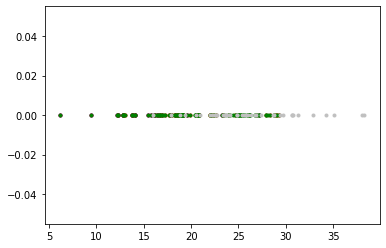

In [ ]:
val = 0
plt.plot(c1_p, np.zeros_like(c1_p) + val, '.', c='b')
plt.plot(c2_p, np.zeros_like(c2_p) + val, '.', c='r')
plt.plot(c3_p, np.zeros_like(c3_p) + val, '.', c='g')
plt.plot(c4_p, np.zeros_like(c4_p) + val, '.', c='silver')


In [ ]:
from sklearn.metrics import mean_squared_error


y_test_pred = model.predict(X_test)

square_error = np.subtract(y_test, y_test_pred[0])
square_error = np.square(square_error)
square_error = np.sqrt(square_error)

print(y_test.shape)
print(y_test_pred.shape)
print(square_error.shape)

(167,)
(167, 1)
(167,)


In [ ]:
square_error

array([ 1.86350365,  1.03649635,  3.96350365,  9.96350365, 11.26350365,
        1.86350365,  0.56350365, 10.06350365,  3.53649635, 16.36350365,
        1.26350365, 18.63649635,  5.96350365,  2.83649635,  6.43649635,
        0.46350365,  3.33649635,  1.43649635,  2.33649635, 16.76350365,
        3.83649635,  4.26350365, 14.76350365,  4.63649635,  7.23649635,
        2.06350365,  3.23649635,  2.76350365, 11.76350365,  2.96350365,
        6.53649635,  9.73649635, 15.66350365,  3.06350365,  0.86350365,
       11.86350365, 21.53649635, 24.83649635,  4.73649635,  7.76350365,
       11.06350365, 16.76350365, 17.96350365, 17.63649635, 10.56350365,
        5.06350365,  2.56350365, 24.83649635,  0.76350365,  3.26350365,
       13.26350365,  3.96350365,  2.93649635,  8.36350365, 11.96350365,
        2.33649635,  2.06350365, 10.16350365,  5.46350365, 11.56350365,
       15.56350365, 10.86350365,  1.06350365,  4.36350365,  0.46350365,
        2.36350365,  1.76350365,  3.46350365,  0.16350365,  9.96

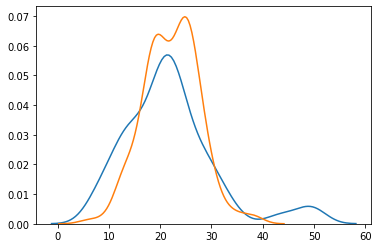

In [ ]:
#check distrubtion train and test is similar
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(y_test, hist=False)
sns.distplot(y_test_pred, hist=False)

plt.show()

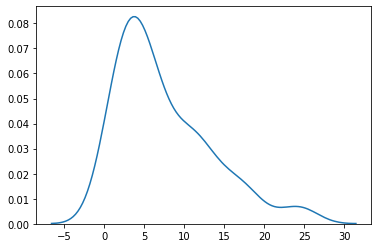

In [ ]:
sns.distplot(square_error, hist=False)


plt.show()